#### Import libraries and read and copy the csv file

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read in the csv
data = pd.read_csv('census_06_2022.csv')

#copy the csv file, will be working on this and keeping the original file
df = data.copy()
df

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Orryjar Lane,Kieran,Ward,56.0,Head,Single,Male,Careers adviser,None,Catholic
1,1,1,Orryjar Lane,Abdul,Pickering,43.0,None,Single,Male,Public relations account executive,None,Christian
2,2,2,Orryjar Lane,Rosemary,Steele,30.0,Head,Single,Female,Meteorologist,None,Christian
3,3,3,Orryjar Lane,Marilyn,Cooke,53.0,Head,Single,Female,Jewellery designer,None,Christian
4,4,4,Orryjar Lane,Samantha,Coates,63.0,Head,Single,Female,Trade mark attorney,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
9650,9650,1,Armagh Longhouse,Diana,Yates,39.0,Head,Divorced,Female,Unemployed,Physical Disability,Methodist
9651,9651,1,Armagh Longhouse,Aaron,Yates,6.0,Son,NaN,Male,Student,None,NaN
9652,9652,1,Armagh Longhouse,Geraldine,Yates,3.0,Daughter,NaN,Female,Child,None,NaN
9653,9653,1,Armagh Longhouse,Daniel,Yates,1.0,Son,NaN,Male,Child,None,NaN


## Data Exploration and Cleaning

### Get information about each variables in the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9655 entries, 0 to 9654
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     9655 non-null   int64  
 1   House Number                   9655 non-null   object 
 2   Street                         9655 non-null   object 
 3   First Name                     9655 non-null   object 
 4   Surname                        9655 non-null   object 
 5   Age                            9655 non-null   float64
 6   Relationship to Head of House  9655 non-null   object 
 7   Marital Status                 7258 non-null   object 
 8   Gender                         9655 non-null   object 
 9   Occupation                     9655 non-null   object 
 10  Infirmity                      9655 non-null   object 
 11  Religion                       7189 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage

#### Observations

- The variable "Unnamed: 0" is a serial number which isn't useful in our analysis
- Age is float, so it will be changed to integers

#### Corrections

- Dropping the variable "Unamed:0"

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Orryjar Lane,Kieran,Ward,56.0,Head,Single,Male,Careers adviser,None,Catholic
1,1,Orryjar Lane,Abdul,Pickering,43.0,None,Single,Male,Public relations account executive,None,Christian
2,2,Orryjar Lane,Rosemary,Steele,30.0,Head,Single,Female,Meteorologist,None,Christian
3,3,Orryjar Lane,Marilyn,Cooke,53.0,Head,Single,Female,Jewellery designer,None,Christian
4,4,Orryjar Lane,Samantha,Coates,63.0,Head,Single,Female,Trade mark attorney,None,None


- Convert variable "Age" from float to integer

In [5]:
df["Age"]= df['Age'].astype('int')
df["Age"]
# refernce: https://sparkbyexamples.com/pandas/pandas-convert-column-to-int/

0       56
1       43
2       30
3       53
4       63
        ..
9650    39
9651     6
9652     3
9653     1
9654    64
Name: Age, Length: 9655, dtype: int32

### Check for duplicate values

In [6]:
df.duplicated().sum()

0

###### There are no duplicates in this data

### Check for missing values

In [7]:
df.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2397
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2466
dtype: int64

#### Observations

- Marital Status has 2397 missing vlues
- Religion has 2466 missing values

#### Corrections

There are different ways to treat missing value of objects which are:
- Fill with the most frequent variable which is the mode
- Drop missing values
- Forward/ Backward fill
- Tag as unknown

Since the missing values are much i'll be going with the last option by filling the missing values as unknown

In [8]:
#filling missing values
df["Marital Status"] = df["Marital Status"].fillna("Minor")
df["Religion"] = df["Religion"].fillna("Unknown")

In [9]:
df.isnull().sum()
#missing values has been treated

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

### Check unique values to know if there are any formatting issues

- #### Check unique values for House Number

In [10]:
df["House Number"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

#### Observations

- There's inconsistency in the entries for "House Number", an entry is written in alphabet instead of number
- Data type is object instead of integer

#### Corrections

- Treating incosistency/format error


In [11]:
#replacing "eight" with "8"
df["House Number"] = df["House Number"].replace("eight", "8")

In [12]:
df["House Number"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

- #### Check unique values for Street

In [13]:
df["Street"].unique()

array(['Orryjar Lane', 'Protectorate Manors', 'West Road',
       'Wood Extensions', 'Dumnonianet Drive', 'Ali Harbors',
       'Hill Street', 'Clayton Lake', 'Spider Avenue', 'Ashton Corner',
       'Snapdragonbarrier Drive', 'Walker Oval', 'St.Mark Terrace',
       'Ball Rest', 'Hodgson Mountain', 'Tamarisk Street',
       'Clearwater Lodge', 'Foxglovepull Drive', 'Repton Drive',
       'Wembley Junction', 'Weston Point', 'Barrett Circles', 'Bond Burg',
       'Wells Avenue', 'St.Matthew Valleys', 'Rogers Lodge',
       'Pilgrim Drive', 'Black Causeway', 'Coconut Lane', 'John Avenue',
       'Kelly Knoll', 'Mason Drive', 'Taylor Flat', 'Brickcharm Street',
       'Lynch Streets', 'Cooper Lane', 'Testamentcurl Street',
       'Rogers Field', 'Southampton Wells', 'Todd Canyon',
       'Kestrelshy Lane', 'Tegid Drive', 'Brass Centers',
       'Pinewood Course', 'Queen Road', 'Stirlingtun Road',
       'Fisher Drive', 'Repton Crest', 'Pillarfix Street',
       'Charity Avenue', 'Repton S

#### Observation
- There are no format error/ inconsistent entries

- #### Check unique values for First Name

In [14]:
df["First Name"].unique()

array(['Kieran', 'Abdul', 'Rosemary', 'Marilyn', 'Samantha', 'Phillip',
       'Douglas', 'Louise', 'Jade', 'Mathew', 'Annette', 'William',
       'Claire', 'Ellie', 'Rhys', 'Chelsea', 'Joshua', 'Lynn', 'Valerie',
       'Dylan', 'Diane', 'John', 'Julie', 'Jacob', 'Gary', 'Katherine',
       'Sophie', 'Damian', 'Christopher', 'Frederick', 'Charles', 'Eric',
       'Gareth', 'Clive', 'Kathleen', 'Lindsey', 'Sam', 'Benjamin',
       'June', 'Leah', 'Paul', 'Linda', 'Joseph', 'Suzanne', 'Laura',
       'Justin', 'Bruce', 'Alex', 'Geoffrey', 'Paula', 'Luke', 'Natalie',
       'Joe', 'Wayne', 'Lesley', 'Josephine', 'Jessica', 'Simon', 'Sian',
       'Caroline', 'Max', 'Malcolm', 'Joyce', 'Georgia', 'Graham',
       'Grace', 'Terence', 'Judith', 'Lewis', 'Dean', 'Margaret',
       'Sylvia', 'Gordon', 'Martin', 'Joanne', 'Cameron', 'Geraldine',
       'Jake', 'Trevor', 'Sarah', 'Elliot', 'Maurice', 'Ruth', 'Denise',
       'Anna', 'Yvonne', 'Dorothy', 'Bernard', 'Jack', 'Jill', 'Jeremy',
    

- #### Check unique values for Surname

In [15]:
df["Surname"].unique()

array(['Ward', 'Pickering', 'Steele', 'Cooke', 'Coates', 'Dale', 'Thomas',
       'Mitchell', 'Young', 'Wilkinson', 'Allen', 'Jackson', 'Kerr',
       'Williams', 'Collins', 'Lee', 'Read', 'Long', 'Turner', 'Murray',
       'Holmes', 'Lewis', 'Richards', 'Byrne', 'Khan', "O'Brien", 'Fox',
       'Boyle-Barker', 'Taylor', 'Roberts-Taylor', 'Shah', 'Carr',
       'Thompson', 'Davies-Thompson', 'Davies', 'Atkinson', 'Walsh',
       'Wells', 'Webb', 'Hall', 'North', 'Williamson', 'Woods', 'Brown',
       'Warner', 'Baker', 'Norton', 'Elliott', 'Long-Elliott', 'Rice',
       'Hope', 'Lloyd', 'Burton', 'Graham', 'Chapman', 'Skinner',
       'Simpson', 'Metcalfe', 'Cole', 'Bird', 'Kaur', 'Frost', 'Wood',
       'Shaw', 'Fry', 'Marshall', 'Dixon', 'Gallagher', 'Moore', 'Newman',
       'Burns', 'Cartwright', 'Ellis', "O'Connor", 'Wilson', 'Hopkins',
       'Morton', 'Porter', 'McCarthy', 'Price', 'Jones', 'Ross', 'Gordon',
       'Smith', 'Lynch', 'Blackburn', 'Short', 'Hill', 'Morgan', 'Mille

- #### Check unique values for Age

In [16]:
df["Age"].unique()

array([ 56,  43,  30,  53,  63,  52,  64,  57,  24,  20,  13,  11,   9,
        45,  60,  55,  31,  49,  50,  19,  21,  26,  25,  59,  46,  41,
        14,  16,  47,  22,  15,  72,  68,  66,  33,  35,   5,   2,  86,
        37,  18,  32,  51,  71,  74,  29,   4,  77,  83,  65,  79,  40,
        58,  39,  36,  34,  73,  38,  27,  12,   7,   8,  81,  80,  61,
        67,  23,  42,  10,  76,  84,  28,  17,  69,  62,   6,   0,  48,
        54,  44,   3,   1,  75,  96,  78,  94,  91,  98, 102,  70,  85,
        89,  87,  82,  95, 103,  97,  88, 100,  90,  92,  99])

#### Observation

- There's entry 0 for Age, we'll asumme this is a new born baby under the age of 1year

In [17]:
#create new coloumn Age Range for easy analysis

In [18]:
df['Age_range'] = pd.cut(df.Age, bins=[-1,4,17,25,35,50,65,200], labels=['0-4','5-17','18-25','26-35',
                                                                        '36-50', '51-65','66+'])
#refrence: stackoverflow

In [19]:
df.groupby(['Age'],sort=False)['Age'].count().sort_values(ascending=False).head(60)

Age
19    193
18    171
21    171
32    170
42    170
22    169
38    169
34    166
39    163
15    158
35    157
5     154
33    154
36    154
20    152
50    152
7     151
37    150
44    148
13    147
29    147
43    147
30    146
17    143
25    143
27    142
16    141
40    141
14    140
41    138
52    138
26    137
10    137
11    136
4     135
3     134
49    133
46    130
31    130
28    130
9     129
8     127
6     127
24    125
56    121
45    121
47    120
48    119
54    118
1     114
12    113
23    112
57    109
2     109
0     105
53    105
60    102
51    101
59    100
58     98
Name: Age, dtype: int64

- #### Check unique values for Relationship to Head of House

In [20]:
df["Relationship to Head of House"].unique()

array(['Head', 'None', 'Daughter', 'Son', 'Husband', 'Partner', 'Wife',
       'Lodger', 'Grandson', 'Granddaughter', 'Sibling', 'Adopted Son',
       'Nephew', 'Neice', 'Step-Son', 'Visitor', 'Cousin',
       'Step-Daughter', 'Adopted Grandson', 'Adopted Daughter',
       'Adopted Granddaughter', 'Daughter-in-law', ' '], dtype=object)

#### Observation

- There's an empty string/white spaces
- There's also a 'None' which will be assumed to be that the individual is staying alone

#### Correction

- Replacing white spaces with None

Empty string can be replace with unkwown or mode but decided to replace with 'None'

In [21]:
#replacing empty string
df["Relationship to Head of House"] = df["Relationship to Head of House"].replace(' ', 'None')
df["Relationship to Head of House"].unique()

array(['Head', 'None', 'Daughter', 'Son', 'Husband', 'Partner', 'Wife',
       'Lodger', 'Grandson', 'Granddaughter', 'Sibling', 'Adopted Son',
       'Nephew', 'Neice', 'Step-Son', 'Visitor', 'Cousin',
       'Step-Daughter', 'Adopted Grandson', 'Adopted Daughter',
       'Adopted Granddaughter', 'Daughter-in-law'], dtype=object)

In [22]:
#renaming coloumn
df = df.rename(columns={"Relationship to Head of House": "Relationship"})

- #### Check unique value for Marital status

In [23]:
df["Marital Status"].unique()

array(['Single', 'Divorced', 'Married', 'Minor', 'Widowed', 'W', 'M', 'D',
       'S'], dtype=object)

#### Observation

- There are inconsistencies in the entries

#### Corrections

In [24]:
# replace the values
df["Marital Status"] = df["Marital Status"].replace({'W':'Widowed', 'M':'Married', 'D':'Divorced', 'S':'Single'})
df["Marital Status"].unique()

array(['Single', 'Divorced', 'Married', 'Minor', 'Widowed'], dtype=object)

- #### Check unique value for Gender

In [25]:
df["Gender"].unique()

array(['Male', 'Female', 'male', 'M', 'f', 'female', 'm', 'F'],
      dtype=object)

#### Observations
- There are inconsistency in the entries

#### Correction


In [26]:
#replace values
df["Gender"] = df["Gender"].replace({'M':'Male', 'F':'Female', 'm':'Male', 'f':'Female', 
                                     'male':'Male', 'female':'Female'})
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

- #### Check unique values for Occupation

In [27]:
df['Occupation'].unique()
#not showing all the occupations

array(['Careers adviser', 'Public relations account executive',
       'Meteorologist', ..., 'Retired Architectural technologist',
       'Retired Geographical information systems officer',
       'Retired Physiological scientist'], dtype=object)

In [28]:
#list out all occupations
list(df['Occupation'])

['Careers adviser',
 'Public relations account executive',
 'Meteorologist',
 'Jewellery designer',
 'Trade mark attorney',
 'Retail merchandiser',
 'Commissioning editor',
 'Unemployed',
 'Engineer, mining',
 'University Student',
 'Charity officer',
 'Volunteer coordinator',
 'Student',
 'Student',
 'Student',
 'Water quality scientist',
 'Chartered legal executive (England and Wales)',
 'Multimedia programmer',
 'Unemployed',
 'Oncologist',
 'Medical technical officer',
 'Podiatrist',
 'University Student',
 'University Student',
 'Insurance broker',
 'Chief of Staff',
 'Museum/gallery curator',
 'Engineer, chemical',
 'Architect',
 'Scientific laboratory technician',
 'Cabin crew',
 'Unemployed',
 'Unemployed',
 'Community development worker',
 'Financial trader',
 'University Student',
 'Insurance broker',
 'Structural engineer',
 'Unemployed',
 'Environmental education officer',
 'Unemployed',
 'Medical technical officer',
 'Student',
 'Broadcast engineer',
 'Student',
 'Unemploy

#### Observations
- No format error

In [29]:
#create new coloumn Employment status for easy analysis

In [30]:
#replace any occupation with the word retired by rertired
df['Occupation'] =df['Occupation'].str.replace('Retired.*', 'Retired', regex=True) 

#replace PhD student by university Student
df['Occupation'] = df['Occupation'].str.replace('PhD.*', 'University Student', regex=True)

In [31]:
#Create a new column 'Employment Status for easy analysis'
conditions = [
    ((df['Occupation']!='Child') & (df['Occupation']!='Student') & (df['Occupation']!='Unemployed') & 
    (df['Occupation']!='University Student') & (df['Occupation']!='Retired')) , df['Occupation']=='Child', 
    df['Occupation']=='Student', df['Occupation']=='Unemployed', df['Occupation']=='University Student', 
    df['Occupation']=='Retired'
]

choices = ['Employed', 'Student', 'Student', 'Unemployed', 'University Student', 'Retired']

df['Employment Status'] = np.select(conditions, choices, default=np.nan)
#ref: Stack Overflow

- #### Check unique value for Infirmity

In [32]:
df['Infirmity'].unique()

array(['None', 'Deaf', 'Physical Disability', 'Unknown Infection', ' ',
       'Disabled', 'Mental Disability', 'Blind'], dtype=object)

#### Observation
- There are empty strings

#### Corrections

In [33]:
#replace empty string with 'None'
df['Infirmity'] = df['Infirmity'].replace({' ':'None'})
df['Infirmity'].unique()

array(['None', 'Deaf', 'Physical Disability', 'Unknown Infection',
       'Disabled', 'Mental Disability', 'Blind'], dtype=object)

- #### Check unique value for Religion 

In [34]:
df['Religion'].unique()

array(['Catholic', 'Christian', 'None', 'Unknown', 'Jewish', 'Methodist',
       'Sikh', 'Muslim', 'Orthodoxy', 'Agnostic', 'Private', 'Quaker',
       ' ', 'Pagan'], dtype=object)

#### Observation
- There are empty string
- Missing values were previously changed to unknown, this wil be changed to 'None'

#### Corrections

- Replace empty string with 'None' and unknown with 'None'

In [35]:
df['Religion'] = df['Religion'].replace({' ':'None', '':'None'})
df['Religion'].unique()

array(['Catholic', 'Christian', 'None', 'Unknown', 'Jewish', 'Methodist',
       'Sikh', 'Muslim', 'Orthodoxy', 'Agnostic', 'Private', 'Quaker',
       'Pagan'], dtype=object)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9655 entries, 0 to 9654
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   House Number       9655 non-null   object  
 1   Street             9655 non-null   object  
 2   First Name         9655 non-null   object  
 3   Surname            9655 non-null   object  
 4   Age                9655 non-null   int32   
 5   Relationship       9655 non-null   object  
 6   Marital Status     9655 non-null   object  
 7   Gender             9655 non-null   object  
 8   Occupation         9655 non-null   object  
 9   Infirmity          9655 non-null   object  
 10  Religion           9655 non-null   object  
 11  Age_range          9655 non-null   category
 12  Employment Status  9655 non-null   object  
dtypes: category(1), int32(1), object(11)
memory usage: 877.3+ KB


### Explore data to gain more insight

In [37]:
df.describe(include= 'all')

,House Number,Street,First Name,Surname,Age,Relationship,Marital Status,Gender,Occupation,Infirmity,Religion,Age_range,Employment Status
count,9655,9655,9655,9655,9655.000000,9655,9655,9655,9655,9655,9655,9655,9655
unique,172,105,365,652,NaN,22,5,2,645,7,13,7,5
top,1,Barrett Circles,Jessica,Smith,NaN,Head,Single,Female,Student,None,None,36-50,Employed
freq,373,874,43,266,NaN,3310,3465,5045,1935,9579,3072,2155,5074
mean,NaN,NaN,NaN,NaN,34.987985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,21.420863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations
- Minimum age is 0 and maximum age is 103
- Majority of the individual are  Single, Female and Students 

### Pandas prifiling

In [38]:
#pandas profiling for more deep insight
import pandas_profiling
profile = pandas_profiling.ProfileReport(df)
profile.to_file('data_profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\DELL\anaconda3\lib\site-packages\multimethod\__init__.py:315: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Analysis and Visualization

### Check for errors with Visualization

Create new coloumn Age_range for easy analysis and visualization

Are there any head who are bewlow 18?

- Since it is stated that only individuals above the age of 18 can be head, it is paramount to check this in the data

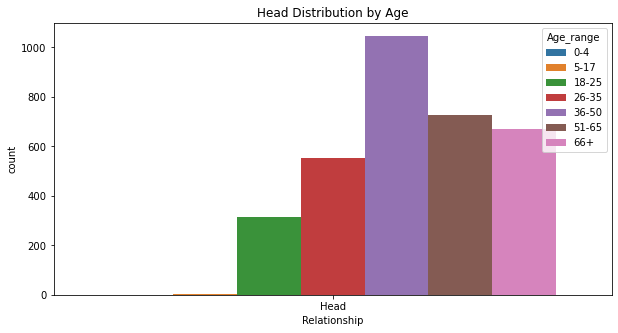

In [39]:
df_head=df[df["Relationship"].isin(["Head"])] #datafram where relation is only head
plt.figure(figsize=(10,5))
sns.countplot(data =df_head, x='Relationship', hue = 'Age_range');
plt.title("Head Distribution by Age");
plt.savefig('head_age.png')

#### Observations
- Individuals between age 5-17 are classified as head

In [40]:
#check data where age is 5-27
df_head[df_head["Age_range"].isin(["5-17"])]

,House Number,Street,First Name,Surname,Age,Relationship,Marital Status,Gender,Occupation,Infirmity,Religion,Age_range,Employment Status
2229,26,Wembley Junction,Heather,Begum-Jones,16,Head,Divorced,Female,Unemployed,None,Unknown,5-17,Unemployed
3958,36,Lynch Streets,Reece,Farmer,16,Head,Divorced,Male,Unemployed,None,Unknown,5-17,Unemployed
4679,17,Pinewood Course,Amber,Roberts,16,Head,Divorced,Female,Student,None,Unknown,5-17,Student


In [41]:
#change relationship of minor classified as head of house to None
df.loc[df.Age_range == '5-17', 'Relationship'] = 'None'

In [42]:
#check if the changes have been made
df_rel=df[df["Relationship"].isin(["Head"])]
df_rel['Age_range'].value_counts()

36-50    1046
51-65     725
66+       669
26-35     554
18-25     313
0-4         0
5-17        0
Name: Age_range, dtype: int64

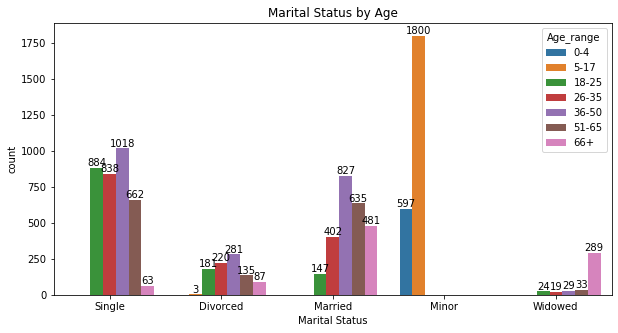

In [43]:
#check to see if all minors are below the age of 18
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x='Marital Status', hue = 'Age_range');
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Marital Status by Age');
plt.savefig('Marital Status by Age')

In [44]:
#3 people who  are under the age of 18 are classified as divorced as shown previously

### Population Pyramid
- The first thing to do is the population pyramid, to get more insight on the population as a whole

In [45]:
#create %years age range for the population pyramid
df['P_Age_range'] = pd.cut(df.Age, bins=[-1,4,9,14,19,24,29,34,39,44,49,54,59,64,69,74,79,84,89,94,99,200], 
                           labels=['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44',
                                       '45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89',
                                       '90-94','95-99','100+'])

In [46]:
#get the value count of age and Gender
d_age= df[['P_Age_range','Gender']].value_counts()

#covert to a data Frame
df_age =pd.DataFrame(d_age)

#sort by age range
df_age.sort_values(by=['P_Age_range'])

0
P_Age_range Gender     
0-4         Female  292
            Male    305
5-9         Female  332
            Male    356
10-14       Female  331
            Male    342
15-19       Female  420
            Male    386
20-24       Male    326
            Female  403
25-29       Female  367
            Male    332
30-34       Female  414
            Male    352
35-39       Female  417
            Male    376
40-44       Female  409
            Male    335
45-49       Female  359
            Male    264
50-54       Female  314
            Male    300
55-59       Female  254
            Male    268
60-64       Male    209
            Female  232
65-69       Female  144
            Male    105
70-74       Female  160
            Male    146
75-79       Male    107
            Female   84
80-84       Female   72
            Male     51
85-89       Male     34
            Female   25
90-94       Male      6
            Female    5
95-99       Female    9
            Male      6
100+        Male      4
            Female    2

In [47]:
#create a new data frame
age_df = pd.DataFrame({'Age':['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44',
                                       '45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89',
                                       '90-94','95-99','100+'],
                       
                       #use value count of male and female
                      'Female':[292, 332, 331, 420, 403, 367, 414, 417, 409, 359, 314, 254, 232, 144, 160, 84, 72, 25,5, 9, 2],
                      'Male':[305, 356, 342, 386, 326, 332, 352, 376, 335, 264, 300, 268, 209, 105, 146, 107, 51, 34, 6, 6, 4]})
AgeClass =['100+','95-99','90-94','85-89','80-84','75-79','70-74','65-69','60-64','55-59','50-54',
           '45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']

In [48]:
#assign varable name
y = age_df['Age']
x1 =age_df['Male']*-1

#multiply by -1 so it can be at the oppsoite side
x2 = age_df['Female']

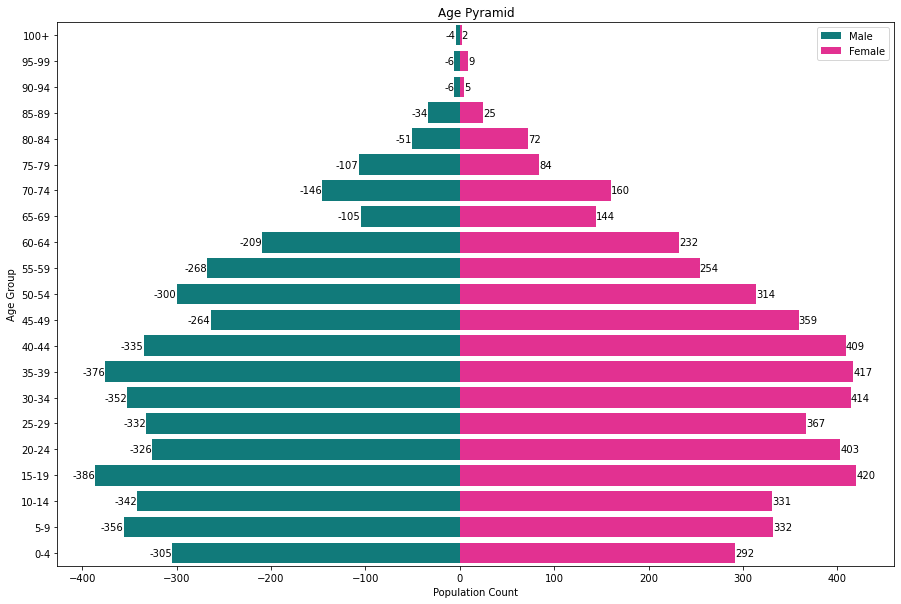

In [49]:
#plot the age pyramid
plt.figure(figsize=(15,10))
age_pyramid = sns.barplot(x=x1, y='Age', data=age_df, order=AgeClass, color=('darkcyan'), label='Male');
 
age_pyramid = sns.barplot(x=x2, y='Age', data=age_df, order=AgeClass, color=('deeppink'), label='Female');
 
age_pyramid.legend()
plt.title('Age Pyramid');
plt.xlabel('Population Count')
plt.ylabel('Age Group')


for i in age_pyramid.containers:
    age_pyramid.bar_label(i,)
plt.savefig('Age Pyramid')

#### Observations

- Slow population growth
- Low death rate
- declining birth rate 
- There are bound to be more retired people in the future as the majority of the popolution are at the working age and very few school age individuals

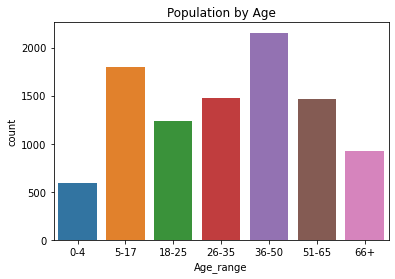

In [52]:
sns.countplot(data=df,x='Age_range');
plt.title('Population by Age');
plt.savefig('Population by Age')

### Birth rate

In [53]:
age_zero = df['Age'].value_counts()[0]
age_zero
#total number of people age 0
#ref: https://www.geeksforgeeks.org/how-to-count-occurrences-of-specific-value-in-pandas-column/

105

In [54]:
present_birth_rate = (105/9655)*1000
present_birth_rate

10.875194199896427

In [55]:
#age4
age_four = df['Age'].value_counts()[4]
age_four

135

In [56]:
Previous_birth_rate = (135/9655)*1000
Previous_birth_rate

13.982392542723977

In [57]:
Birth_rate_diff = present_birth_rate- Previous_birth_rate
Birth_rate_diff

-3.10719834282755

In [58]:
age_df.value_counts()['25-29'] #number of female betweem 25-29

Female  Male
367     332     1
dtype: int64

In [59]:
#30-34
age_df.value_counts()['30-34']

Female  Male
414     352     1
dtype: int64

#### There's a decrease in birth rate

### Death rate

In [60]:
d_rage= df[['P_Age_range']].value_counts()

#covert to a data Frame
df_rage =pd.DataFrame(d_rage)

#sort by age range
df_rage =df_rage.sort_values(by=['P_Age_range'], ascending = False)
df_rage = df_rage.rename(columns={0: "Count"}).reset_index()
df_rage['diff']=df_rage['Count'].diff(periods=-1)
#ref: https://pythontic.com/pandas/dataframe-computations/

In [61]:
df_rage

,P_Age_range,Count,diff
0,100+,6,-9.0
1,95-99,15,4.0
2,90-94,11,-48.0
3,85-89,59,-64.0
4,80-84,123,-68.0
5,75-79,191,-115.0
6,70-74,306,57.0
7,65-69,249,-192.0
8,60-64,441,-81.0
9,55-59,522,-92.0


In [62]:
D = 9+48+64+68+115+192 #sum of all death for people age 65 above
death = D/6 #Average death rate
Death_rate = (death/9655)*1000
Death_rate

8.562057655791472

In [63]:
(((df['P_Age_range']).value_counts()['95-99']) -((df['P_Age_range']).value_counts()['100+']))

9

In [64]:
#death rate per anum
16.2 + -11.4 + 13.6 + 9.6 + 1.8

29.8

In [65]:
(29.8/9655)*100000

308.64836872087

### Migration

Immmigration

In [66]:
#making assumptions that lodgers who are employed or retired might decide to stay in town permenently
Emp_lodger = df[((df["Relationship"]=='Lodger')& (df["Marital Status"]!='Divorced'))& ((df['Employment Status']=='Employed')|(df['Employment Status']=='Retired'))]
len(Emp_lodger)

272

In [67]:
(272/9655)*1000
#~35 per thousand  immigratnt

28.171931641636455

Emmigration

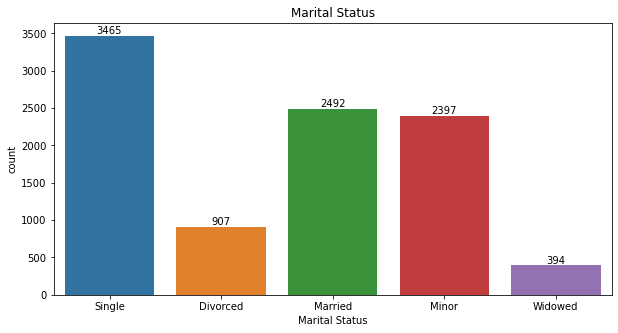

In [68]:
#checking marital status to determine emmigration
plt.figure(figsize=(10,5))
marital_status = sns.countplot(data = df, x='Marital Status');
plt.title('Marital Status')
for i in marital_status.containers:
    marital_status.bar_label(i,)
plt.savefig('Marital Status')

In [69]:
#making assumptions that all the patners of divorcees who aint students left the town
Divorced = df[(df['Marital Status']=='Divorced')&
              (df['Employment Status']!='University Student') & (df['Employment Status']!='Retired')]
Divorced['Gender'].value_counts()

Female    459
Male      306
Name: Gender, dtype: int64

In [70]:
#There are more female divorcee than male, it is safe to say majority of the male divorcee left the town
459-306

153

In [71]:
(153/9655)*1000
#~16 per thousand emmigrated

15.846711548420506

### Occupancy

- Aaron O'Neill(2022) "For the first time since data became available, newly-built houses in Britain have been built with fewer than three bedrooms per house in the 2010s. From the 1930s until the 1980s, the number of bedrooms fluctuated between 3.16 and 3.63 rooms per house, however declining family sizes caused this number to gradually decrease from the 1980s onwards, and in the 2010s the average number of bedrooms has fallen to 2.95 rooms per house."

- The 2011 census shows that The average number of rooms in UK houses is 2.6 which is approximately 3. In this project, it will be assumed that the houses have 3 bedroooms each.

- The maximum numer of people allowed in a 3 bedroom house in the UK is 5



#ref: https://england.shelter.org.uk/housing_advice/repairs/check_if_your_home_is_overcrowded_by_law

#ref :https://lginform.local.gov.uk/reports/

#ref: https://www.statista.com/statistics/1056041/average-number-bedrooms-new-british-houses-1930-2020/

In [72]:
'''to get unique house address and know the number of occupancy in each house,  
merged the coloumn house number and street'''

#merge house number and street
df['House Address'] = df['House Number'] +' ' + df['Street']

In [73]:
(df["House Address"].value_counts()).mean()
#average occupancy is aaproximately 3

2.916918429003021

In [74]:
len((df['House Address']).unique())
#number of unique houshold

3310

In [75]:
(df["House Address"].value_counts()<5).sum()
#under occupancy

2784

In [76]:
#% of under occupancy
(2784/3310)*100

84.10876132930514

In [77]:
(df["House Address"].value_counts()>5).sum()
#overcrowded

188

In [78]:
#% of overcrowded
(188/3310)*100

5.6797583081570995

In [79]:
(df["House Address"].value_counts()<=2).sum()
#extrememly under occupied

1675

In [80]:
# % of extremely under occupied
(1675/3310)*100

50.60422960725075

In [81]:
(df["House Address"].value_counts()>=7).sum()
# extremely overcrowded

93

In [82]:
(93/3310)*1000
# extremely over occupied

28.096676737160124

In [83]:
(df["House Address"].value_counts()==5).sum()

338

In [84]:
#household with minors less than 3
minor_occ = df[df['Marital Status']=='Minor']
(minor_occ["House Address"].value_counts()<=2).sum()

977

In [85]:
#household with minors less than 3
(minor_occ["House Address"].value_counts()>=3).sum()

297

In [86]:
df.groupby(['House Address'],sort=False)['House Address'].count().sort_values(ascending=False).tail(1000)

House Address
13 Wolverine Forges    2
10 Pinewood Course     2
9 Clearwater Lodge     2
19 Queen Road          2
2 Cooper Lane          2
                      ..
12 Pilgrim Drive       1
34 Ali Harbors         1
32 Ali Harbors         1
31 Ali Harbors         1
29 Lynch Streets       1
Name: House Address, Length: 1000, dtype: int64

In [87]:
df[df['House Address']=='12 Pilgrim Drive']

,House Number,Street,First Name,Surname,Age,Relationship,Marital Status,Gender,Occupation,Infirmity,Religion,Age_range,Employment Status,P_Age_range,House Address
3469,12,Pilgrim Drive,Ellie,Blake,49,Head,Single,Female,Software engineer,None,Methodist,36-50,Employed,45-49,12 Pilgrim Drive


In [88]:
df[df['House Address']=='13 Wolverine Forges']

,House Number,Street,First Name,Surname,Age,Relationship,Marital Status,Gender,Occupation,Infirmity,Religion,Age_range,Employment Status,P_Age_range,House Address
5816,13,Wolverine Forges,Sam,Fisher,18,Head,Married,Male,Student,None,Unknown,18-25,Student,15-19,13 Wolverine Forges
5817,13,Wolverine Forges,Lorraine,Fisher,19,Wife,Married,Female,University Student,None,None,18-25,University Student,15-19,13 Wolverine Forges


In [89]:
df[df['House Address']=='2 Cooper Lane']

,House Number,Street,First Name,Surname,Age,Relationship,Marital Status,Gender,Occupation,Infirmity,Religion,Age_range,Employment Status,P_Age_range,House Address
3968,2,Cooper Lane,Marian,Woods,72,Head,Widowed,Female,Unemployed,None,Methodist,66+,Unemployed,70-74,2 Cooper Lane
3969,2,Cooper Lane,Cameron,Woods,37,Son,Single,Male,Minerals surveyor,None,Methodist,36-50,Employed,35-39,2 Cooper Lane


In [90]:
occupancy= df[['House Address']].value_counts()
df_occupancy =pd.DataFrame(occupancy)
df_occupancy = df_occupancy.rename(columns={0: "Occupants"}).reset_index()
df_occupancy['Marital Status'] = df['Marital Status']
df_occupancy
df["Occupants"] = df_occupancy['Occupants']

In [91]:
df_widowed = df[df['Marital Status']=='Widowed']
df_divorced = df[df['Marital Status']=='Divorced']
df_Married = df[df['Marital Status']=='Married']
df_Single = df[df['Marital Status']=='Single']

<Figure size 720x360 with 0 Axes>

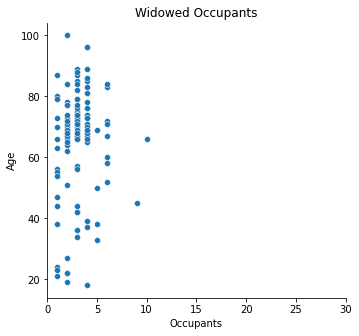

In [92]:
plt.figure(figsize=(10,5));
sns.relplot(data=df_widowed, y='Age', x='Occupants');
plt.title('Widowed Occupants');
plt.xlim(0, 30);

plt.subplots_adjust(top=0.88);
plt.savefig('Widowed Occupants');

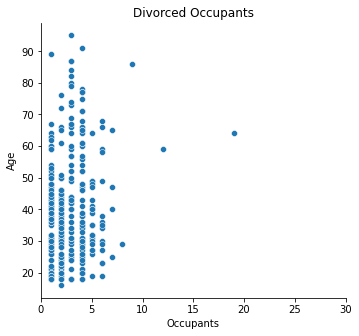

In [93]:
sns.relplot(data=df_divorced, y='Age', x='Occupants');
plt.title('Divorced Occupants');
plt.xlim(0, 30);

plt.subplots_adjust(top=0.88)
plt.savefig('Divorced Occupants')

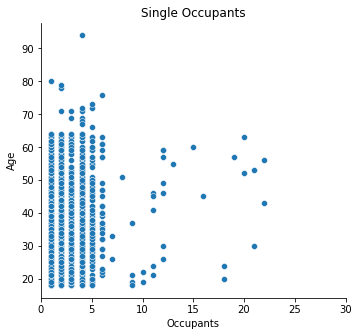

In [94]:
sns.relplot(data=df_Single, y='Age', x='Occupants');
plt.title('Single Occupants');

plt.subplots_adjust(top=0.88)
plt.savefig('Single Occupants')
plt.xlim(0, 30);

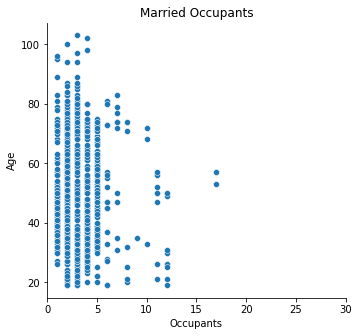

In [95]:
sns.relplot(data=df_Married, y='Age', x='Occupants');
plt.title('Married Occupants');

plt.subplots_adjust(top=0.88)
plt.savefig('Married Occupants')
plt.xlim(0, 30);

84% of the housholds are  under occupied and over  50% are extremly under occupied,
- There are high number of single in the community and majority are staying alone
- There are also divorced and retired people staying alone
- Majority of the married couples have no kids
- Majority of the household have less than 3 children
- There are single,  divorced  and widowed individuals with kid(s)

These are the factors that caused under ocuupied houses

### Commuters


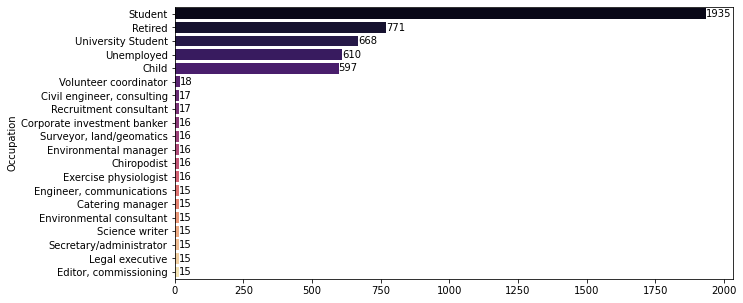

In [96]:
Top_Occupation =df.groupby(['Occupation'],sort=False)['Occupation'].count().sort_values(ascending=False).head(20)
plt.figure(figsize = (10,5))
ax = sns.barplot(x=Top_Occupation.values, y=Top_Occupation.index, palette = 'magma');
for i in ax.containers:
    ax.bar_label(i,)
#refernce : stackoverflow
#https://www.geeksforgeeks.org/how-to-show-values-on-seaborn-barplot/

In [97]:
#replace any occupation with the word retired by rertired
df['Occupation'] =df['Occupation'].str.replace('Retired.*', 'Retired', regex=True) 

#replace PhD student by university Student
df['Occupation'] = df['Occupation'].str.replace('PhD.*', 'University Student', regex=True)

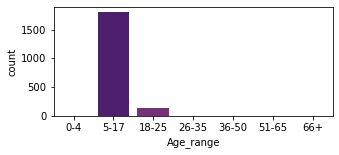

In [98]:
#Check the age of people classified as student
df_student=df[df["Occupation"].isin(["Student"])]
plt.figure(figsize = (5,2))
sns.countplot(data = df_student, x='Age_range', palette = 'magma');

#reference:https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

In [99]:
#check if there are people over the age of 18 as student
df_student["Age"].value_counts()
#this show they are primary(5-11), secondary(11-16) and further educations(16-18) classified as student
#reference: gov.uk(Education and learning)

15    158
5     154
7     151
13    147
17    143
14    140
16    139
10    137
11    136
18    134
9     129
8     127
6     127
12    113
Name: Age, dtype: int64

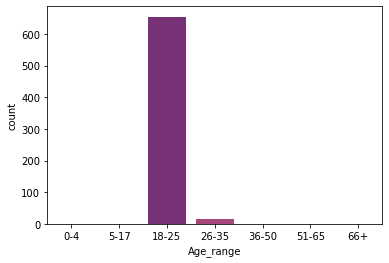

In [100]:
#data of all individuals who are university students
df_Unistudent=df[df["Occupation"].isin(["University Student"])]
sns.countplot(data = df_Unistudent, x='Age_range', palette = 'magma');
# all unversity students are within the age 18-25

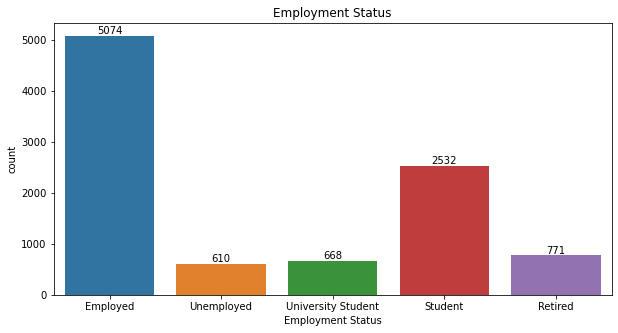

In [101]:
plt.figure(figsize = (10,5))
ax = sns.countplot(data=df, x='Employment Status');
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Employment Status')
plt.savefig('Employment Status')

In [102]:
#exploring occupaction to see those that can be classified as non commuters
list(df['Occupation'].unique())

['Careers adviser',
 'Public relations account executive',
 'Meteorologist',
 'Jewellery designer',
 'Trade mark attorney',
 'Retail merchandiser',
 'Commissioning editor',
 'Unemployed',
 'Engineer, mining',
 'University Student',
 'Charity officer',
 'Volunteer coordinator',
 'Student',
 'Water quality scientist',
 'Chartered legal executive (England and Wales)',
 'Multimedia programmer',
 'Oncologist',
 'Medical technical officer',
 'Podiatrist',
 'Insurance broker',
 'Chief of Staff',
 'Museum/gallery curator',
 'Engineer, chemical',
 'Architect',
 'Scientific laboratory technician',
 'Cabin crew',
 'Community development worker',
 'Financial trader',
 'Structural engineer',
 'Environmental education officer',
 'Broadcast engineer',
 'Engineer, automotive',
 'Mechanical engineer',
 'Retired',
 'Geophysicist/field seismologist',
 'Veterinary surgeon',
 'Computer games developer',
 'Child',
 'Optician, dispensing',
 'Hydrogeologist',
 'Engineer, materials',
 'Retail banker',
 'Risk a

#### Occupations such as retail merchandisers and buyers, community workers, primary and secondary school teachers, fast food workers, barista, volunteer workers, charity workers, police officers, local government workers, prison officers, town planners and herbalists are classifed as non commuter

In [103]:
l1 = df[df['Occupation'].str.contains('Herbalist')]
l2 = df[df['Occupation'].str.contains('Retail merchandiser')]
l3 = df[df['Occupation'].str.contains('retail')]
l4 = df[df['Occupation'].str.contains('Retail buyer')]
l5 = df[df['Occupation'].str.contains('community')]
l6 = df[df['Occupation'].str.contains('teacher')]
l7 = df[df['Occupation'].str.contains('Teacher')]
l8 = df[df['Occupation'].str.contains('Police')]
l9 = df[df['Occupation'].str.contains('food')]
l10 = df[df['Occupation'].str.contains('local')]
l11 = df[df['Occupation'].str.contains('Prison')]
l12 = df[df['Occupation'].str.contains('Town')]
l13 = df[df['Occupation'].str.contains('Herbalist')]
l14 = df[df['Occupation'].str.contains('Barista')]
l15 = df[df['Occupation'].str.contains('Charity')]

In [104]:
len(l1)+len(l2)+len(l3)+len(l4)+len(l5)+len(l6)+len(l7)+len(l8)+len(l9)+len(l10)+len(l11)+len(l12)+len(l13)+len(l14)+len(l15)

239

In [105]:
#out of the employed, 239 people are classified as non commuters
### retired, unemployed, student(not university) are also classified as non commuters
239+563+2534+920

4256

In [106]:
#total of 4256 people are non commuters

9655-4256 #non commuters

5399

In [107]:
5503/9655*100
#%percentage of commuters

56.9963749352667

In [108]:
100 - (239/5503*100)
#%percentage of employed who are commuter

95.65691441032165

- 57% of the population are commuters
- 96% of the employed are commuters

### Religious building
The only place of worhip in town is catholic church, there's need to check if other denomination or religion are growing

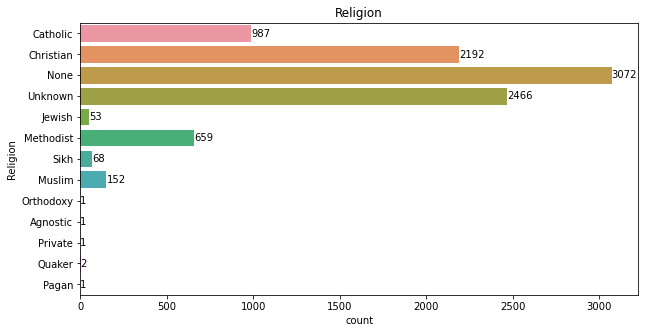

In [109]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data = df, y='Religion');
plt.title('Religion');
for i in ax.containers:
    ax.bar_label(i,)
plt.savefig('Religion')

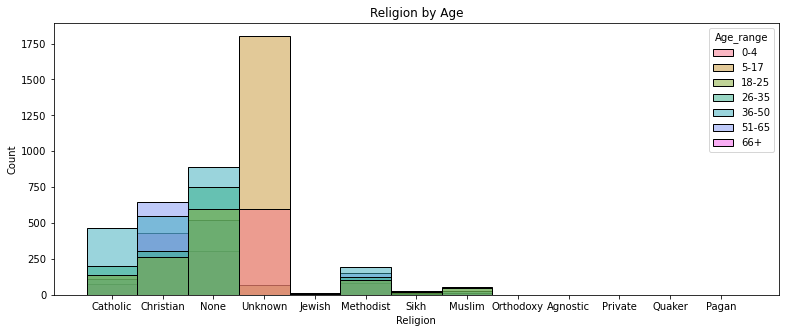

In [110]:
plt.figure(figsize=(13,5))
sns.histplot(data = df, x='Religion',hue= 'Age_range', palette='husl');
plt.title('Religion by Age');

plt.subplots_adjust(top=0.88)
plt.savefig('Religion by age')

In [111]:
#religious people are 
9655-(3072+2466)

4117

In [112]:
(2192/4117)*100
#over 50% of reliogious people are christians

53.242652416808355

In [113]:
(987/4117)*100
#24% of religious people are catholic

23.973767306290988

#### Observations
- From the data we can see that christian denomination is high 
- over 50% of religious people are christians and they do not have a church
- just 24% of religious people are catholic
- methodist is also growing
- There no way to determine religion transfer since all the children are classified as none

### Emergency medical building

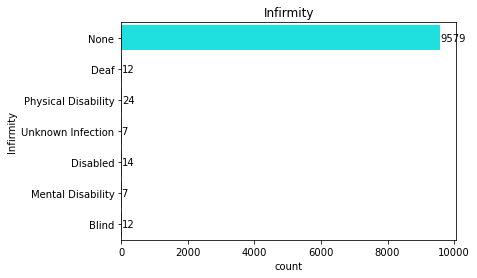

In [114]:
ax = sns.countplot(data = df, y='Infirmity', color ='cyan');
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Infirmity')
plt.subplots_adjust(top=0.88)
plt.savefig('Infirmity')

majority of the population have no infirmity this shows a healthy community
there are different factors to consider to check if there will be need for emergycy medical buildings in  future
- Birth rate: since the birth rate is declining from previous calculaton and it will further decline in future
- Age: Majority of the population are in the middle age and will become old in the future, there might be need for old age care

### Employment and training
We need to check the unemployment rate to determine this

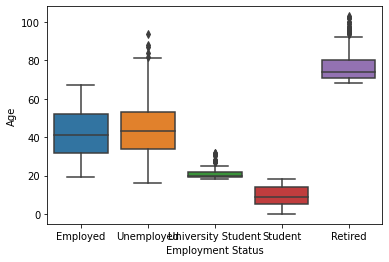

In [115]:
sns.boxplot(data=df, y='Age', x='Employment Status')
plt.subplots_adjust(top=0.88)
#Some individual above the age of 65 and below 18is showing as unemployed

In [116]:
df.loc[df.Age_range == '66+', 'Employment Status'] = "Retired" #change all 66+ to retired
df.loc[df.Age_range == '5-17', 'Employment Status'] = "Student" #change all 5-17 to Student

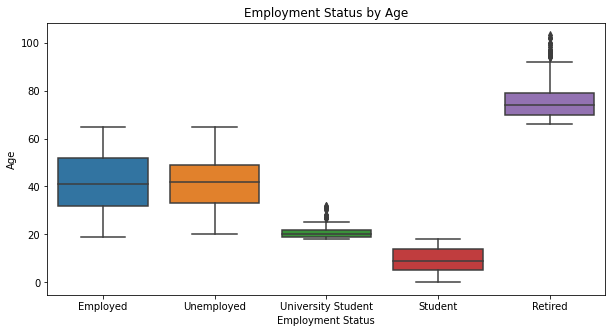

In [117]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, y='Age', x='Employment Status');
plt.subplots_adjust(top=0.88);
plt.title('Employment Status by Age');
plt.savefig('Employement Status by Age')

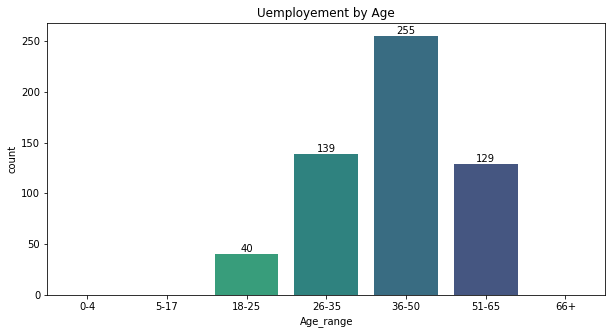

In [118]:
#data of all indivuals  who are unemployed
df_unemployed=df[df["Employment Status"].isin(["Unemployed"])]
plt.figure(figsize=(10,5))
#age range of unemployed
ax =sns.countplot(data = df_unemployed, x='Age_range', palette = 'viridis_r');
plt.title('Uemployement by Age')

for i in ax.containers:
    ax.bar_label(i,)
plt.savefig('Unemployment by Age')

In [119]:
len(df_unemployed)

563

In [120]:
#working age population(18-65)
df['Age_range'].value_counts()

36-50    2155
5-17     1803
26-35    1479
51-65    1465
18-25    1236
66+       920
0-4       597
Name: Age_range, dtype: int64

In [121]:
2155+1479+1465+1236
#total working age of 6335

6335

In [122]:
#There are 563 individuals who are unemployed in the whole population out with working age of 6335
(563/6335)*100
#approximately 8.9% unemploment which is classified as low unemployement rate

8.88713496448303